Import Data

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
ccs_df = pd.read_csv('/home/lbarbut/data/ccs/CCS-Publication-V3/METLIN_IMS_all plot CV %3C2% _dimers.csv')
ccs_df

,Molecule Name,Molecular Formula,METLIN ID,Precursor Adduct,CCS1,CCS2,CCS3,CCS_AVG,% CV,m/z,...,m/z.1,Dimer,Dimer.1,dimer line,CCS,m/z.2,pubChem,inchi,smiles,InChIKEY
0,"3-[3-(2,3-dihydroindol-1-yl)propyl]-1-[(4-fluo...",C19H22FN3O,1181481.0,328.1820[M+H],176.63,176.63,176.63,176.63,0.0,328.1820,...,328.1820,209.886594,Monomer,NaN,135.0,50.0,25345055,InChI=1S/C19H22FN3O/c20-17-8-6-15(7-9-17)14-22...,O=C(NCc1ccc(cc1)F)NCCCN1CCc2c1cccc2,DWYWDNMZIWKHFM-UHFFFAOYSA-N
1,"3-{[1,1'-biphenyl]-4-ylmethylidene}-6-fluoro-2...",C22H15FO3S,1191359.0,379.0799[M+H],192.26,192.26,192.26,192.26,0.0,379.0799,...,379.0799,223.588309,Monomer,NaN,310.0,700.0,NaN,InChI=1S/C22H15FO3S/c23-19-10-11-21-20(13-19)2...,Fc1ccc2c(c1)C(=O)C(=Cc1ccc(cc1)c1ccccc1)CS2(=O)=O,MFNGEIZTLYGVQK-UHFFFAOYSA-N
2,"1-{[3-(4-methoxyphenyl)-1,2,4-oxadiazol-5-yl]m...",C25H28N4O3,1228206.0,433.2234[M+H],211.12,211.12,211.12,211.12,0.0,433.2234,...,433.2234,238.163739,Monomer,NaN,NaN,NaN,17541371,InChI=1S/C25H28N4O3/c1-31-21-10-8-19(9-11-21)2...,COc1ccc(cc1)c1noc(n1)CN1CCN(CC1)C(=O)C1(CCC1)c...,YPHGAJRHIVSPSX-UHFFFAOYSA-N
3,3-[2-oxo-2-(4-phenylmethanesulfonylpiperazin-1...,C22H30N4O5S,1176932.0,463.2010[M+H],204.22,204.22,204.22,204.22,0.0,463.2010,...,463.2010,246.233709,Monomer,NaN,NaN,NaN,16295966,InChI=1S/C22H30N4O5S/c27-19(16-26-20(28)22(23-...,O=C(N1CCN(CC1)S(=O)(=O)Cc1ccccc1)CN1C(=O)NC2(C...,ALHVXFHLDXYEII-UHFFFAOYSA-N
4,"2-{[1,1'-biphenyl]-2-ylamino}-1-(morpholin-4-y...",C18H20N2O2,1183857.0,297.1598[M+H],174.47,174.47,174.47,174.47,0.0,297.1598,...,297.1598,201.535418,Monomer,NaN,NaN,NaN,17463671,InChI=1S/C18H20N2O2/c21-18(20-10-12-22-13-11-2...,O=C(N1CCOCC1)CNc1ccccc1c1ccccc1,YWINZXNEVGTFAX-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,--,--,--,XKTJEHXBSIDWRH-UHFFFAOYSA-N
65284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3825,NaN,NaN,NaN,--,--,--,XKTJEHXBSIDWRH-UHFFFAOYSA-N
65285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,61457,NaN,NaN,NaN,--,--,--,XKTJEHXBSIDWRH-UHFFFAOYSA-N
65286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,--,--,--,XKTJEHXBSIDWRH-UHFFFAOYSA-N


Data Preprocessing

In [49]:
# drop NaN Precusor Adduct rows
ccs_df = ccs_df.dropna(subset=['Precursor Adduct'])

# remove the m/z number before the Precursor Adduct since the info is also in m/z column
ccs_df.loc[:, 'Precursor Adduct'] = ccs_df['Precursor Adduct'].str.replace(r'[0-9.]+', '', regex=True)

# remove [M+Na] rows
ccs_df = ccs_df[ccs_df['Precursor Adduct'] != '[M+Na]']

print(ccs_df['Precursor Adduct'].unique())


['[M+H]' '[M-H]']


In [53]:
# drop NaN CCS_AVG rows
ccs_df = ccs_df.dropna(subset=['CCS_AVG'])
ccs_df.shape
ccs_df

,Molecule Name,Molecular Formula,METLIN ID,Precursor Adduct,CCS1,CCS2,CCS3,CCS_AVG,% CV,m/z,...,m/z.1,Dimer,Dimer.1,dimer line,CCS,m/z.2,pubChem,inchi,smiles,InChIKEY
0,"3-[3-(2,3-dihydroindol-1-yl)propyl]-1-[(4-fluo...",C19H22FN3O,1181481.0,[M+H],176.63,176.63,176.63,176.63,0.000000,328.1820,...,328.1820,209.886594,Monomer,NaN,135.0,50.0,25345055,InChI=1S/C19H22FN3O/c20-17-8-6-15(7-9-17)14-22...,O=C(NCc1ccc(cc1)F)NCCCN1CCc2c1cccc2,DWYWDNMZIWKHFM-UHFFFAOYSA-N
1,"3-{[1,1'-biphenyl]-4-ylmethylidene}-6-fluoro-2...",C22H15FO3S,1191359.0,[M+H],192.26,192.26,192.26,192.26,0.000000,379.0799,...,379.0799,223.588309,Monomer,NaN,310.0,700.0,NaN,InChI=1S/C22H15FO3S/c23-19-10-11-21-20(13-19)2...,Fc1ccc2c(c1)C(=O)C(=Cc1ccc(cc1)c1ccccc1)CS2(=O)=O,MFNGEIZTLYGVQK-UHFFFAOYSA-N
2,"1-{[3-(4-methoxyphenyl)-1,2,4-oxadiazol-5-yl]m...",C25H28N4O3,1228206.0,[M+H],211.12,211.12,211.12,211.12,0.000000,433.2234,...,433.2234,238.163739,Monomer,NaN,NaN,NaN,17541371,InChI=1S/C25H28N4O3/c1-31-21-10-8-19(9-11-21)2...,COc1ccc(cc1)c1noc(n1)CN1CCN(CC1)C(=O)C1(CCC1)c...,YPHGAJRHIVSPSX-UHFFFAOYSA-N
3,3-[2-oxo-2-(4-phenylmethanesulfonylpiperazin-1...,C22H30N4O5S,1176932.0,[M+H],204.22,204.22,204.22,204.22,0.000000,463.2010,...,463.2010,246.233709,Monomer,NaN,NaN,NaN,16295966,InChI=1S/C22H30N4O5S/c27-19(16-26-20(28)22(23-...,O=C(N1CCN(CC1)S(=O)(=O)Cc1ccccc1)CN1C(=O)NC2(C...,ALHVXFHLDXYEII-UHFFFAOYSA-N
4,"2-{[1,1'-biphenyl]-2-ylamino}-1-(morpholin-4-y...",C18H20N2O2,1183857.0,[M+H],174.47,174.47,174.47,174.47,0.000000,297.1598,...,297.1598,201.535418,Monomer,NaN,NaN,NaN,17463671,InChI=1S/C18H20N2O2/c21-18(20-10-12-22-13-11-2...,O=C(N1CCOCC1)CNc1ccccc1c1ccccc1,YWINZXNEVGTFAX-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65278,2-oxo-2-(piperidin-1-yl)ethyl 4-(dimethylamino...,C16H22N2O3,1104361.0,[M-H],177.40,184.26,178.97,180.21,1.994438,289.1558,...,289.1558,199.380741,Monomer,NaN,NaN,NaN,2372645,InChI=1S/C16H22N2O3/c1-17(2)14-8-6-13(7-9-14)1...,CN(c1ccc(cc1)C(=O)OCC(=O)N1CCCCC1)C,LJGFSGHOSPWJEJ-UHFFFAOYSA-N
65279,"3-(4-hydroxyphenyl)-2-{5H,6H,7H,8H,9H-[1,2,4]t...",C16H16N4O,1175562.0,[M-H],172.96,167.05,172.96,170.99,1.995520,279.1251,...,279.1251,196.680477,Monomer,NaN,NaN,NaN,4459718,InChI=1S/C16H16N4O/c17-11-13(10-12-5-7-14(21)8...,N#CC(=Cc1ccc(cc1)O)c1nnc2n1CCCCC2,GYAVTZXZYGOCBX-UHFFFAOYSA-N
65280,2-oxo-2-(piperidin-1-yl)ethyl 1-benzyl-3-(pyri...,C23H24N4O3,1104315.0,[M-H],198.31,191.19,197.54,195.68,1.996866,403.1776,...,403.1776,230.075410,Monomer,NaN,NaN,NaN,4788420,InChI=1S/C23H24N4O3/c28-21(26-12-5-2-6-13-26)1...,O=C(N1CCCCC1)COC(=O)c1cn(nc1c1cccnc1)Cc1ccccc1,JRTBSOYDJPWFEI-UHFFFAOYSA-N
65281,3-(7-methoxy-4-methyl-2-oxochromen-3-yl)-N-(3-...,C19H25NO4,1116367.0,[M-H],182.66,176.41,182.66,180.58,1.998250,330.1711,...,330.1711,210.422060,Monomer,NaN,NaN,NaN,NaN,InChI=1S/C19H25NO4/c1-11(2)13(4)20-18(21)9-8-1...,COc1ccc2c(c1)oc(=O)c(c2C)CCC(=O)NC(C(C)C)C,ATDCNJFHSUFWEW-UHFFFAOYSA-N


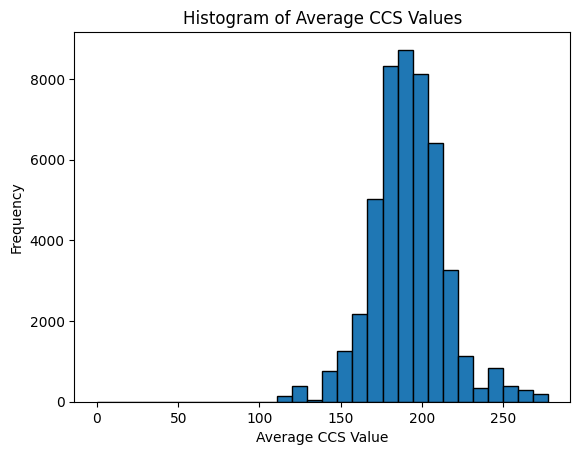

In [54]:
# Plot histogram of CCS_AVG column

plt.hist(ccs_df['CCS_AVG'], bins=30, edgecolor='black')
plt.xlabel('Average CCS Value')
plt.ylabel('Frequency')
plt.title('Histogram of Average CCS Values')
plt.show()